In [1]:
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
class Ant:
    def __init__(self):
        self.x = 0
        self.y = 0

    def move_north(self):
        self.x += 10

    def move_south(self):
        self.x -= 10
    
    def move_east(self):
        self.y += 10

    def move_west(self):
        self.y -= 10
    
    def return_position(self):
        return self.x, self.y
    
class Simulation:
    def __init__(self,steps=1000):
        self.ant = Ant()
        self.n_ants = steps

    def check_ant_position(self):
        return self.ant.return_position()
    
    def move_ant(self):
        rn = random.randint(0,3)
        if rn == 0:
            self.ant.move_north()
        elif rn == 1:
            self.ant.move_south()
        elif rn == 2:
            self.ant.move_east()
        else:
            self.ant.move_west()


    def question_1(self):
        food = [20,-20]
        steps_per_ant = []
        for i in range(self.n_ants):
            field = Simulation()
            counter = 0
            while field.check_ant_position()[0] not in food and field.check_ant_position()[1]not in food:
                field.move_ant()
                counter += 1
            
            steps_per_ant.append(counter)
        print(f'Q1: The mean time for an ant to find food is {np.mean(steps_per_ant)} seconds.')

    
    def question_2(self):
        steps_per_ant = []
        for i in  range(int(self.n_ants/100)):
            field = Simulation()
            counter = 0
            flag = True
            while flag:
                field.move_ant()
                counter += 1
                x = field.check_ant_position()[0]
                y = field.check_ant_position()[1]
                if field.check_point_on_line(x,y):
                    flag = False

            steps_per_ant.append(counter)

        print(f'\nQ2: The mean time for an ant to find food is {np.mean(steps_per_ant)} seconds for {self.n_ants/100} ants; in the limit the answer is infinity.')


    def question_3(self,visual=False):
        food = self.find_food_coordinates(1000,1000)
        steps_per_ant = []

        for i in  range(self.n_ants):
            field = Simulation()
            counter = 0

            flag = True

            while flag:
                field.move_ant()
                counter += 1

                x = field.check_ant_position()[0]
                y = field.check_ant_position()[1]

                if field.check_ant_position() not in food:
                    flag = False

            steps_per_ant.append(counter)


        print(f'\nQ3: The mean time for an ant to find food is {np.mean(steps_per_ant)} seconds.')
    
        if visual:
            xs = [x[0] for x in food]
            ys = [y[1] for y in food]

            fig = plt.figure()
            ax = fig.gca()
            ax.set_xticks(np.arange(-100, 100, 10))
            ax.set_yticks(np.arange(-100, 100, 10))
            plt.rc('grid', linestyle=":", color='black',linewidth=0.5)
            plt.grid(True)
            plt.xlim([-60, 60])
            plt.ylim([-60, 60])
            plt.scatter(xs, ys)
            plt.show()


        
    
    @staticmethod
    def check_point_on_line(x,y):
        if y == -1 * x + 10:
            return True
        else:
            return False
            
    @staticmethod
    def find_food_coordinates(n,m):
        # Helper function to determine the coordinates of the food
        def coordinate_on_boundary(x,y):
            return True if (((x - 2.5)/30)**2 + ((y - 2.5)/40)**2) < 1 else False
        
        food_coordinates = []
        for i in range(-n,n+1,10):
            for j in range(-n,m+1,10):
                if coordinate_on_boundary(i,j):
                    food_coordinates.append((i,j))

        return food_coordinates

Q1: The mean time for an ant to find food is 4.526 seconds.

Q2: The mean time for an ant to find food is 744.02 seconds for 100.0 ants; in the limit the answer is infinity.

Q3: The mean time for an ant to find food is 13.937 seconds.


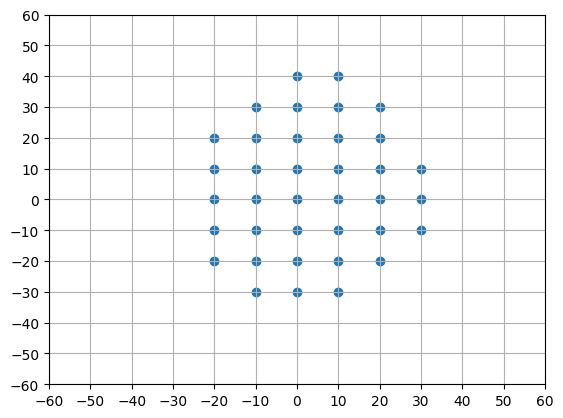

In [6]:
model = Simulation(steps=10000)
model.question_1()
model.question_2()
model.question_3(visual=True)